# Сборный проект

**Описание проекта**

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

**Описание данных**

* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы проданных копий)
* EU_sales — продажи в Европе (миллионы проданных копий)
* JP_sales — продажи в Японии (миллионы проданных копий)
* Other_sales — продажи в других странах (миллионы проданных копий)
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

##### Шаг 1. Откройте файл с данными и изучите общую информацию

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np
from scipy import stats as st
from statistics import mean

pd.options.display.max_columns = 20

In [2]:
games = pd.read_csv('/datasets/games.csv')

In [3]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
games.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [5]:
games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [6]:
games.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


Общая информация понятна. Есть пропуски, нужно проверить типы данных и изменить названия столбцов. Радует что нет отрицательных значений.

##### Шаг 2. Подготовьте данные

###### Замените названия столбцов (приведите к нижнему регистру);

In [7]:
games.columns = games.columns.str.lower()

###### Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;

In [8]:
games.dtypes

name                object
platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score          object
rating              object
dtype: object

In [9]:
games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [10]:
games['year_of_release'] = games['year_of_release'].astype('Int64')

Год это всегда целое число, его логично привести к int.

In [11]:
games['critic_score'] = games['critic_score'].astype('Int64')

###### Обработайте пропуски при необходимости:

In [12]:
games.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [13]:
games = games[False == games['name'].isna()]

Две строки без имени не имеют еще и оценок и рейтингов, что фактически делает их бесполезными. Я их удалю.

In [14]:
games[(games['critic_score'].isna()) & (games['user_score'].isna()) & (games['rating'].isna())]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,<NA>,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,<NA>,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,<NA>,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,<NA>,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,<NA>,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,<NA>,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,<NA>,NaN,NaN


Есть еще строки, в которых отсутствуют все рейтинги, но их много и по заданию мы работаем не только с рейтингами. Я их оставлю.

Касательно заполнения строк, я не стану вставлять среднее или медиану так как считаю что в случае рейтингов,оценок или темболее года это неуместно.

В нашем случае, пропуски вероятнее всего появились из-за ошибки при выгрузке данных или из-за отсутсвия данных за определенные периоды 

tbd - to be difined (будет определено). Соответсвенно их я заменяю на пропуски.

In [15]:
games['user_score'] = games['user_score'].replace('tbd',np.NaN)
games['user_score'] = games['user_score'].astype('float')

###### Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец

In [16]:
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']

###### Обработка дубликатов
В подготовке данных нет шага с дубликатами, так что этот пукт будет дополнительным

In [17]:
games = games.drop_duplicates().reset_index(drop=True)

В первую очередь убрали явные дубликаты

In [18]:
games['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

Не явные дубликаты я проверял через уникальные значения. Ничего необычного не заметил

In [19]:
games[games.duplicated(subset=['name', 'platform', 'year_of_release'])]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16228,Madden NFL 13,PS3,2012,Sports,0.0,0.01,0.0,0.0,83,5.5,E,0.01


In [20]:
# Посмотрим, что осталось
temp = games.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().mean()*100,2),'%') 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   Int64  
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
 11  total_sales      16713 non-null  float64
dtypes: Int64(2), float64(6), object(4)
memory usage: 1.6+ MB
None
-------------------------
name [' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'uDraw Studio: Instant Artist' 'wwe Smackdown vs. Raw 2006'
 '¡Shin Chan Flipa e

In [21]:
games['rating'] = games['rating'].fillna('no rating')

**Вывод** В данном разделе была поставлена задача по подготовке данных для анализа, по итогу работы данные были подготовлены для дальнейшего исследования. 

##### Шаг 3. Проведите исследовательский анализ данных

###### Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

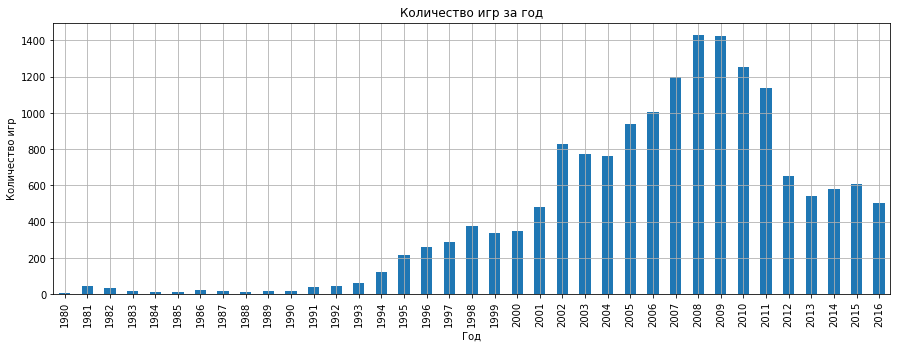

In [22]:
plt.show(games.groupby('year_of_release')['name'].count() \
         .plot.bar(grid=True,title = 'Количество игр за год',figsize = (15,5),xlabel= 'Год', ylabel= 'Количество игр'))

В данном случае видно, что количество игр до 1994 года очень маленькое. Считаю что эти данные не важны.

In [23]:
games = games[games['year_of_release'] > 1993]

###### Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

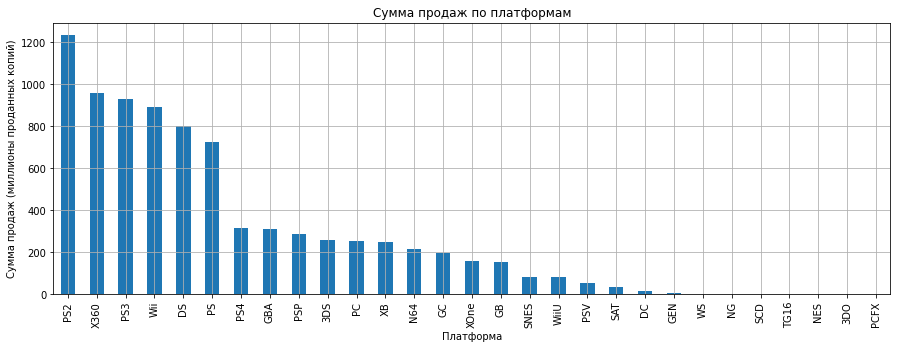

In [24]:
plt.show(games.groupby('platform')['total_sales'].sum().sort_values(ascending = False) \
         .plot.bar(grid=True,title = 'Сумма продаж по платформам',figsize = (15,5),xlabel= 'Платформа', ylabel= 'Сумма продаж (миллионы проданных копий)'))

Мы видим, что наиболее популярными являются:
 * PS2
 * X360
 * PS3
 * Wii
 * DS
 
Думаю что топ 5 для понимания срока жизни платформ подойдет.

In [25]:
top_5_games = games.groupby('platform')['total_sales'].sum().sort_values(ascending = False).head(5).index.to_list()

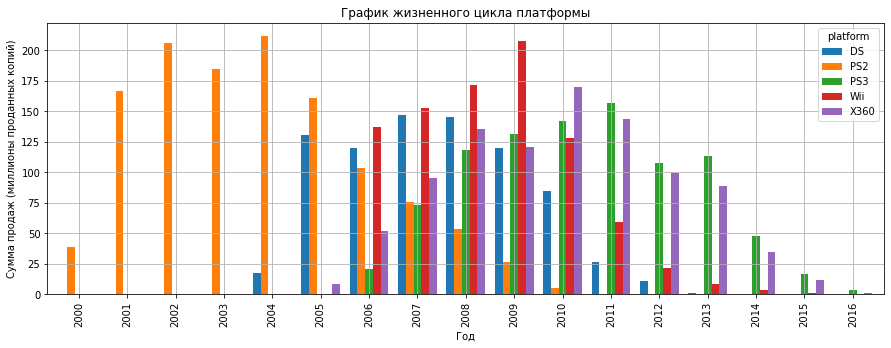

In [26]:
plt.show(games[games['platform'].isin(top_5_games)] \
    .pivot_table(index='year_of_release',columns='platform', values='total_sales', aggfunc='sum') \
    .plot.bar(grid=True,title = 'График жизненного цикла платформы',figsize = (15,5),xlabel= 'Год', ylabel= 'Сумма продаж (миллионы проданных копий)',width = 0.8))

Судя по графику, каждая консоль прожила около 10 лет.

In [27]:
life_cycle = []
for game in top_5_games:
    life_cycle.append(len(games.query('(platform == @game)')['year_of_release'].unique()))
mean(life_cycle)

11.2

В среднем оказывается 11.2 года, что довольно близко к наблюдению, но так все же точнее. За этот срок платформа появляется и уходит.

###### Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год. 

Мы видимо что следующее поколение консолей развивается после пика предудущего.Заметно что каждый пик немного смещен, а падение PS2 и подъем PS3  особено наглядны. Пики продаж топ 5 консолей заканчиваются около 2010 года, а значит после этого времени начинается развитие нового поколения. Думаю что нужно взять данные 2010 и далее.

###### Не учитывайте в работе данные за предыдущие годы.

In [28]:
games_2010 = games[games['year_of_release'] >= 2013]

Благодарю за информацию, тогда я сделаю период в 3 года, включая 2016. Хочу уточнить, что понимаю для название переменной следовало юы ихменить, но это займет довольно много времени, а у меня с работой его совсем мало(

###### Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

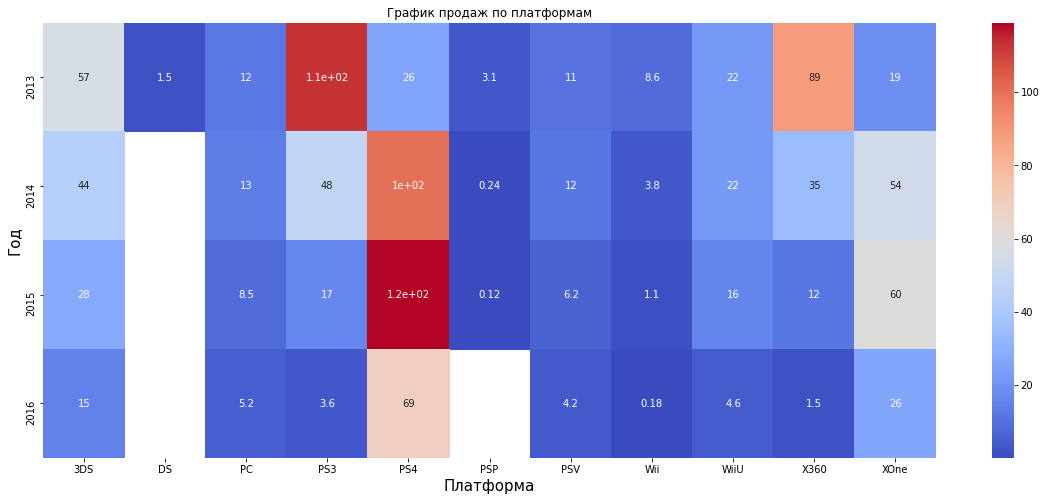

In [29]:
plt.figure(figsize=(20, 8))
plt.axes().set_title('График продаж по платформам')
sns.heatmap(games_2010.pivot_table(index='year_of_release',columns='platform', values='total_sales', aggfunc='sum'),annot=True, cmap="coolwarm")
plt.xlabel('Платформа', fontsize = 15)
plt.ylabel('Год', fontsize = 15)
plt.show()

По некоторым платформам данные не полные, что логично. Старые платформы уже не продаются, или новые еще не начали продаваться.
Видно что старые платформы 3DS или PS уменьшаются, а новые PS4 или XOne наращивают продажи.
Немного выбивается 2016 год, из условия я видел что он может быть не полным, сейчас проверю.

In [30]:
games_2010.pivot_table(index='year_of_release', values='total_sales', aggfunc = sum)

,total_sales
year_of_release,
2013,361.24
2014,331.53
2015,267.98
2016,129.94


Действительно, объемы продаж намного меньше чем в остальных годах. Вероятнее всего данные не полные.

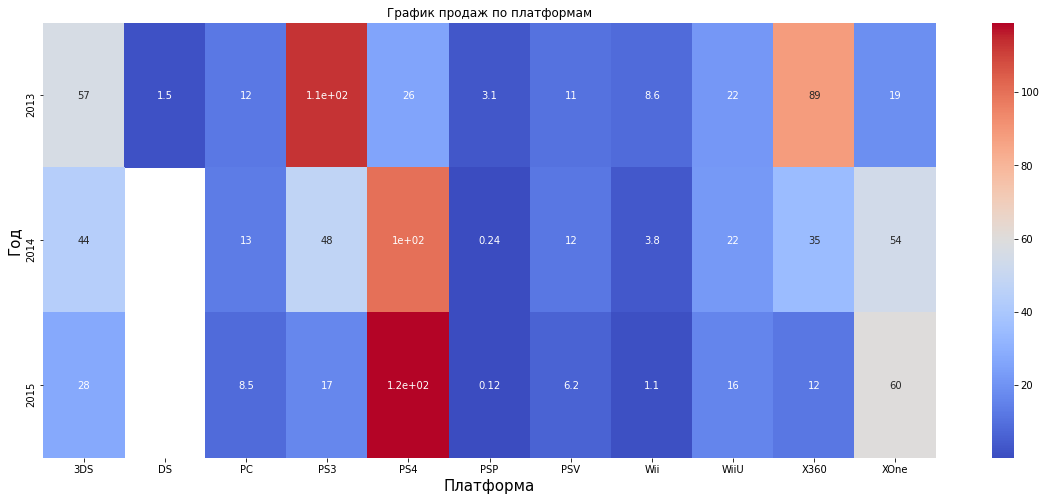

In [31]:
games_2010_no_2016 = games_2010[games_2010['year_of_release'] < 2016]
plt.figure(figsize=(20, 8))
plt.axes().set_title('График продаж по платформам')
sns.heatmap(games_2010_no_2016.pivot_table(index='year_of_release',columns='platform', values='total_sales', aggfunc='sum'),annot=True, cmap="coolwarm")
plt.xlabel('Платформа', fontsize = 15)
plt.ylabel('Год', fontsize = 15)
plt.show()

Не учитывая 2016 можно сказать что 3DS,DS,PC,PS2,PS3,PSP,PSV не буду все перечислять )) они падают

При этом современные платформы PS4,WiiU,XOne растут. Их я и выберу как потенциально прибыльные.

2016 год из графика убрал для красоты, далее он будет использоваться

###### Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

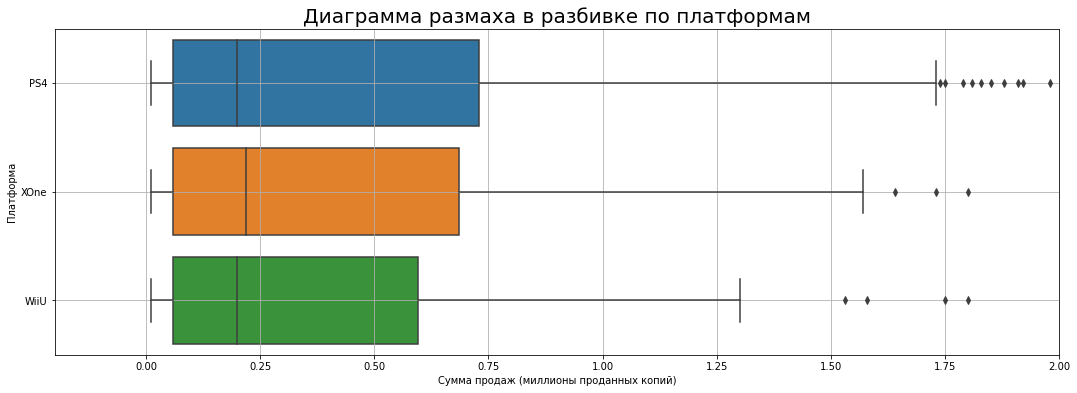

In [32]:
plt.figure(figsize=(18, 6))
plt.xlim(-0.2, 2)
plt.title('Диаграмма размаха в разбивке по платформам', fontsize=20)
sns.boxplot(x='total_sales', y='platform', data=games_2010[games_2010['platform'].isin(['PS4','WiiU','XOne'])], orient='h')
plt.ylabel('Платформа')
plt.xlabel('Сумма продаж (миллионы проданных копий)')
plt.grid(True);

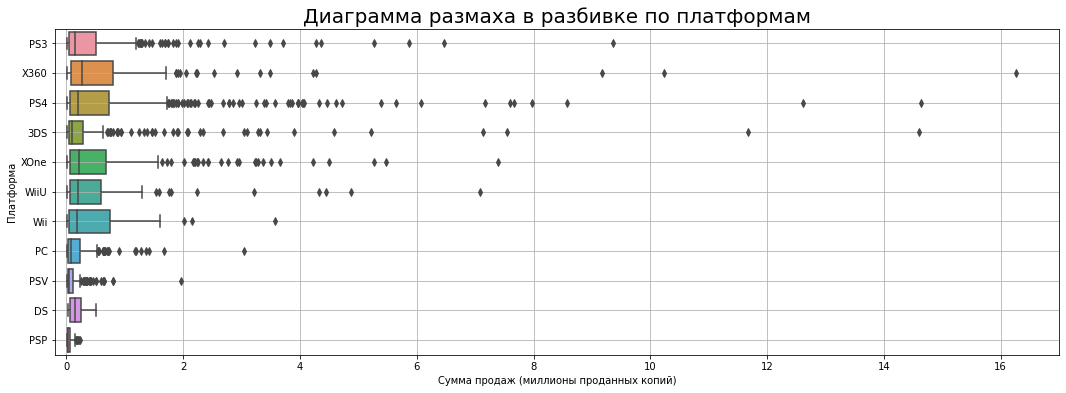

In [33]:
plt.figure(figsize=(18, 6))
plt.xlim(-0.2, 17)
plt.title('Диаграмма размаха в разбивке по платформам', fontsize=20)
sns.boxplot(x='total_sales', y='platform', data=games_2010, orient='h')
plt.ylabel('Платформа')
plt.xlabel('Сумма продаж (миллионы проданных копий)')
plt.grid(True);

1

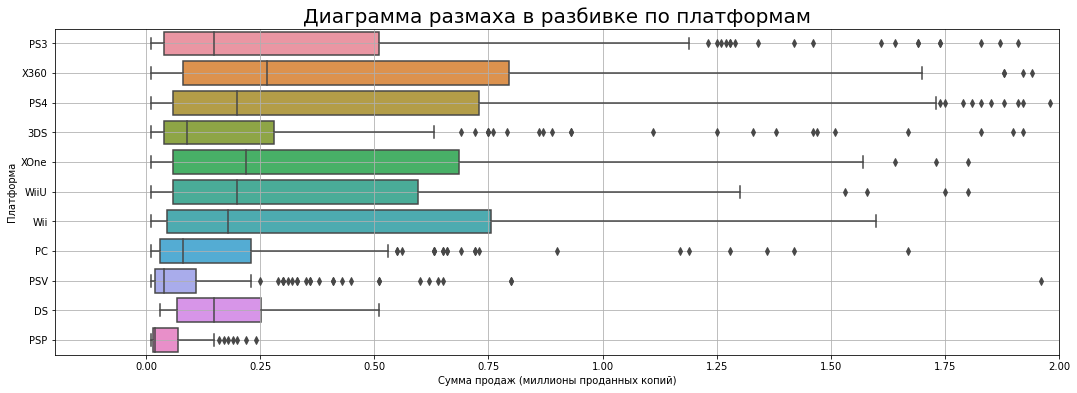

In [34]:
plt.figure(figsize=(18, 6))
plt.xlim(-0.2, 2)
plt.title('Диаграмма размаха в разбивке по платформам', fontsize=20)
sns.boxplot(x='total_sales', y='platform', data=games_2010, orient='h')
plt.ylabel('Платформа')
plt.xlabel('Сумма продаж (миллионы проданных копий)')
plt.grid(True);1

Видно что отличаются как медианные продажи, так и наличество и характер выбросов.

###### Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

Я возьму PS4 как самую знакомую

Диаграмма рассеяния для PS4


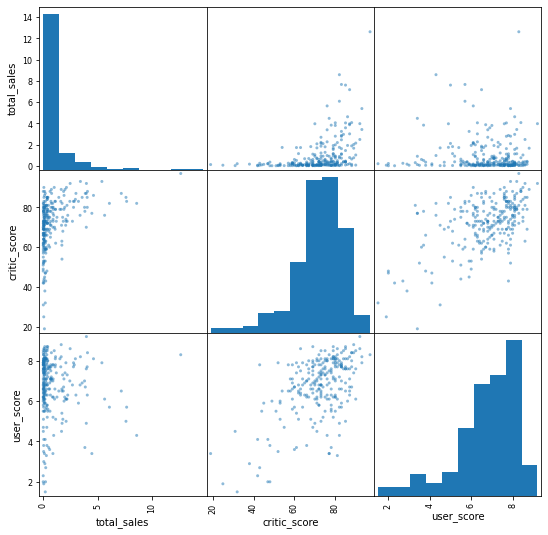

In [35]:
print("Диаграмма рассеяния для PS4")
pd.plotting.scatter_matrix(games_2010[games_2010['platform'] == "PS4"][['total_sales', 'critic_score', 'user_score']], figsize=(9, 9)) 
plt.show()

/tmp/ipykernel_676/936488869.py:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_title('График корреляции')


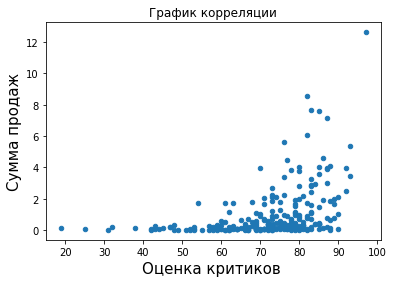

In [36]:
games_2010[games_2010['platform'] == 'PS4'].plot(kind='scatter', x='critic_score', y='total_sales')
plt.axes().set_title('График корреляции')
plt.xlabel('Оценка критиков ', fontsize = 15)
plt.ylabel('Сумма продаж', fontsize = 15)
plt.show()

Чем лучше рейтинг, тем игра лучше, следовательно больше продаж, но в столбце `user_score` есть игры, которые имеют высокую оценку , но при этом мало продались.

In [38]:
print("Матрица корреляций")
games_2010[games_2010['platform'] == "PS4"][['total_sales', 'critic_score', 'user_score']].corr()

Матрица корреляций


,total_sales,critic_score,user_score
total_sales,1.000000,0.406568,-0.031957
critic_score,0.406568,1.000000,0.557654
user_score,-0.031957,0.557654,1.000000


По данной матрице видно, что корреляция между оценкой критиков и продажами 0.4, что означает среднюю, умеренную связь. В то же время между продажами и отзывами пользователей связь слабая. Вероятнее всего это связано с тем что малая часть пользователей оставляет отзывы. К тому же, те кому игра нравится оставляют отзывы реже.

###### Соотнесите выводы с продажами игр на других платформах.

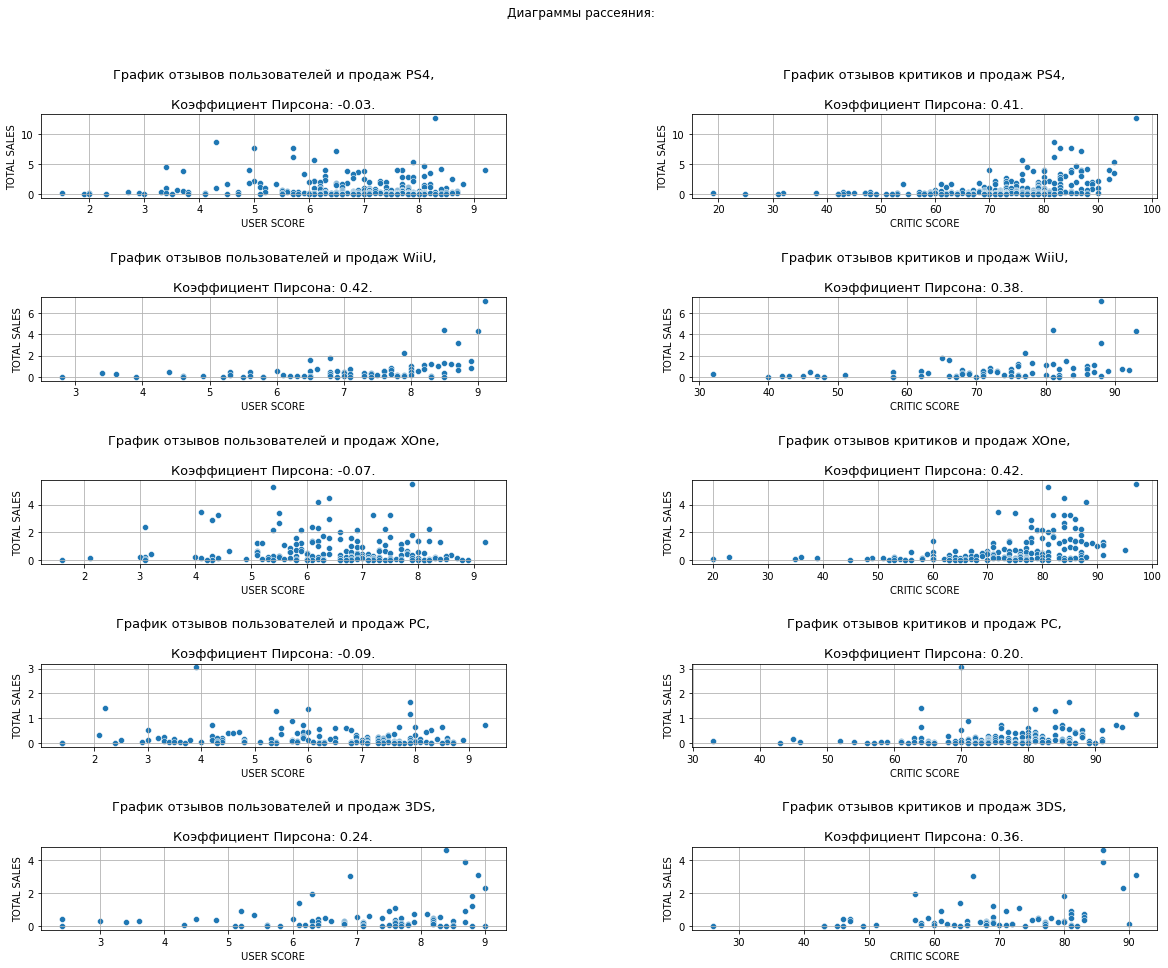

In [39]:
games_2010_platforms = games_2010[games_2010['platform'].isin(['PS4','WiiU','XOne','PC','3DS'])]
position = 0
plt.figure(figsize=[20,15])
plt.subplots_adjust(wspace=0.4, hspace=1.2)
plt.suptitle('Диаграммы рассеяния:', fontsize=12)

for platform_name in ['PS4','WiiU','XOne','PC','3DS']:
    position += 1
    for_console = games_2010_platforms[(games_2010_platforms['platform'] == platform_name)]
    
    plt.subplot(5, 2, position)
    cor_with_user_score = for_console['total_sales'].corr(for_console['user_score'])
    plt.title(f'График отзывов пользователей и продаж {platform_name},\n\nКоэффициент Пирсона: {cor_with_user_score:.2f}.', fontsize=13)
    sns.scatterplot(x='user_score', y='total_sales', data=for_console)
    plt.xlabel('USER SCORE')
    plt.ylabel('TOTAL SALES')
    plt.grid(True)
    
    position += 1
    plt.subplot(5, 2, position)
    cor_with_critic_score = for_console['total_sales'].corr(for_console['critic_score'].astype('float32'))
    plt.title(f'График отзывов критиков и продаж {platform_name},\n\nКоэффициент Пирсона: {cor_with_critic_score:.2f}.', fontsize=13)
    sns.scatterplot(x='critic_score', y='total_sales', data=for_console)
    plt.xlabel('CRITIC SCORE')
    plt.ylabel('TOTAL SALES')
    plt.grid(True);

Сделал 5 штук


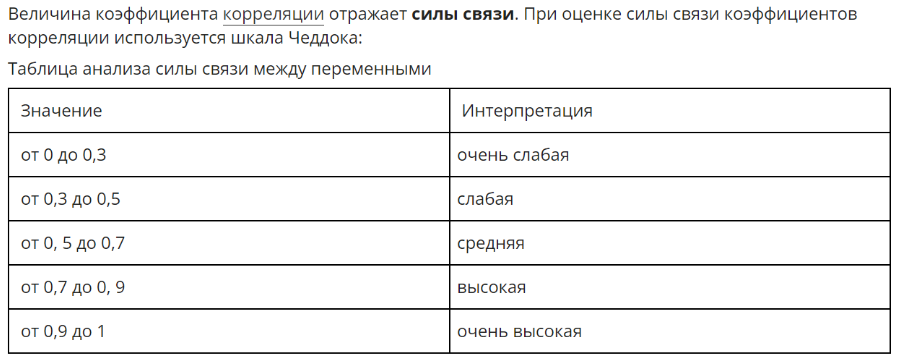

###### Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

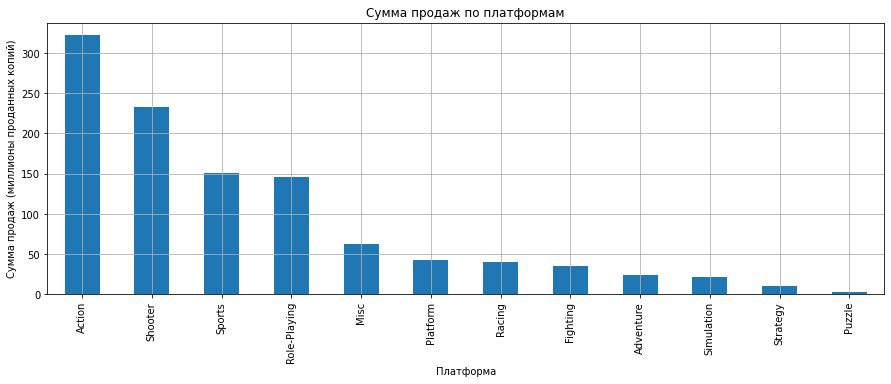

In [40]:
plt.show(games_2010.groupby('genre')['total_sales'].sum().sort_values(ascending = False) \
         .plot.bar(grid=True,title = 'Сумма продаж по платформам',figsize = (15,5),xlabel= 'Платформа', ylabel= 'Сумма продаж (миллионы проданных копий)'))

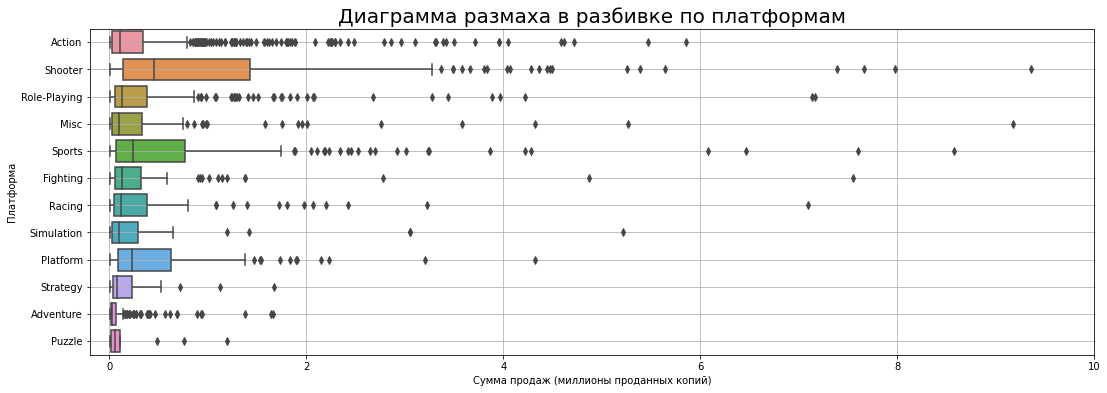

In [41]:
plt.figure(figsize=(18, 6))
plt.xlim(-0.2, 10)
plt.title('Диаграмма размаха в разбивке по платформам', fontsize=20)
sns.boxplot(x='total_sales', y='genre', data=games_2010, orient='h')
plt.ylabel('Платформа')
plt.xlabel('Сумма продаж (миллионы проданных копий)')
plt.grid(True);

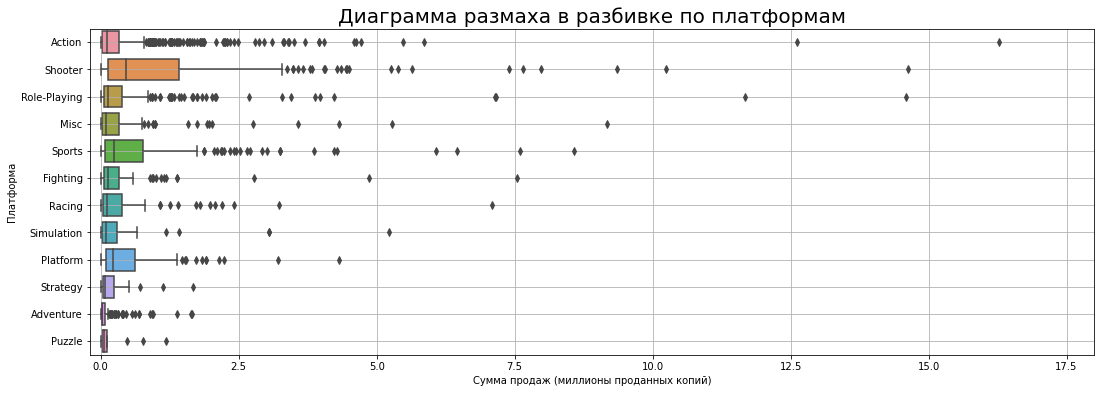

In [42]:
plt.figure(figsize=(18, 6))
plt.xlim(-0.2, 18)
plt.title('Диаграмма размаха в разбивке по платформам', fontsize=20)
sns.boxplot(x='total_sales', y='genre', data=games_2010, orient='h')
plt.ylabel('Платформа')
plt.xlabel('Сумма продаж (миллионы проданных копий)')
plt.grid(True);

In [43]:
games_2010.groupby('genre')['total_sales'].median().sort_values(ascending = False)

genre
Shooter         0.450
Sports          0.240
Platform        0.225
Role-Playing    0.125
Fighting        0.125
Racing          0.120
Action          0.110
Simulation      0.100
Misc            0.100
Strategy        0.080
Puzzle          0.060
Adventure       0.030
Name: total_sales, dtype: float64

Я сделал две диаграммы размаха и оставил таблицу. Благодарю за уточнение с медианами, это действительно изменило результат

Наиболее выгодным жанром является shooter, за ним с существенным отставанием идет sports.  Низкими продажами отличились Puzzle и Adventure.

**Вывод** В данном разделе была поставлена задача по исследовательскому анализу данных. Была отображена структура данных веделены наиболее прибыльные платформы и актауальный период. Посчитана корреляция между показателями.

##### Шаг 4. Составьте портрет пользователя каждого региона

**Определите для пользователя каждого региона (NA, EU, JP):**

###### Самые популярные платформы (топ-5). Опишите различия в долях продаж.

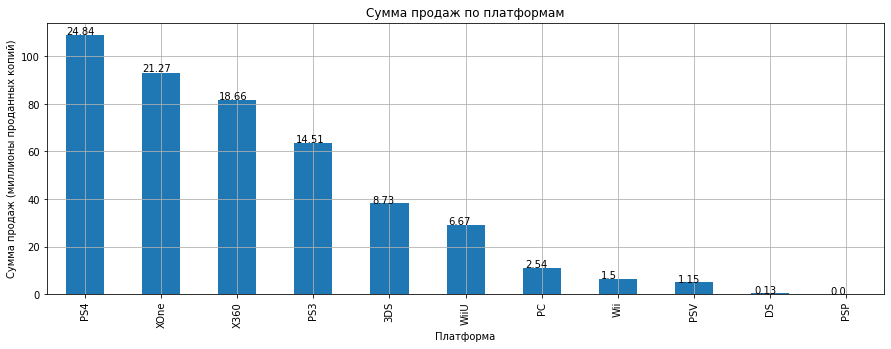

In [44]:

ax = games_2010.groupby('platform')['na_sales'].sum().sort_values(ascending = False) \
         .plot.bar(grid=True,title = 'Сумма продаж по платформам',figsize = (15,5),xlabel= 'Платформа', ylabel= 'Сумма продаж (миллионы проданных копий)')

for p in ax.patches:
    ax.annotate(str(round(p.get_height() / games_2010['na_sales'].sum() * 100,2)), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.show()

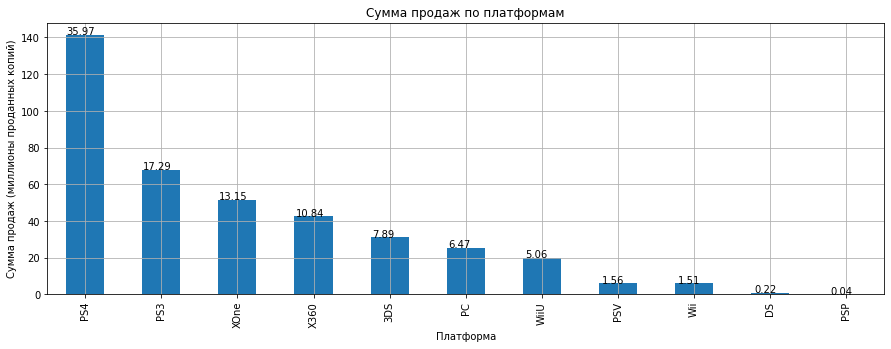

In [45]:

ax = games_2010.groupby('platform')['eu_sales'].sum().sort_values(ascending = False) \
         .plot.bar(grid=True,title = 'Сумма продаж по платформам',figsize = (15,5),xlabel= 'Платформа', ylabel= 'Сумма продаж (миллионы проданных копий)')

for p in ax.patches:
    ax.annotate(str(round(p.get_height() / games_2010['eu_sales'].sum() * 100,2)), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.show()

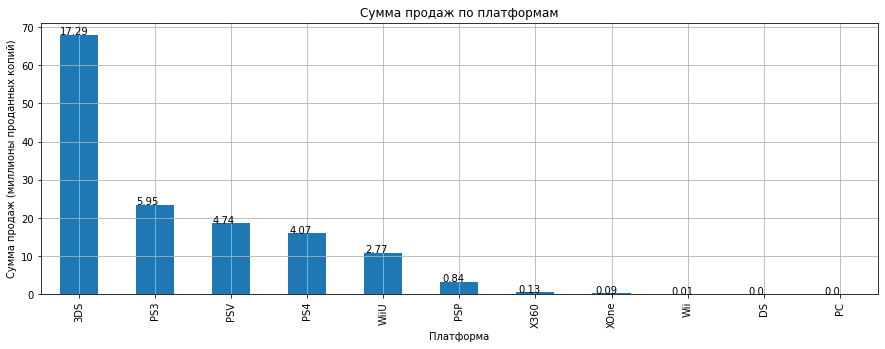

In [46]:

ax = games_2010.groupby('platform')['jp_sales'].sum().sort_values(ascending = False) \
         .plot.bar(grid=True,title = 'Сумма продаж по платформам',figsize = (15,5),xlabel= 'Платформа', ylabel= 'Сумма продаж (миллионы проданных копий)')

for p in ax.patches:
    ax.annotate(str(round(p.get_height() / games_2010['eu_sales'].sum() * 100,2)), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.show()

В данном случае заметно, что Европейские и Американские рынки похожи преимуществом PS3 и X360, в то время как в Японии рынок самобытен и в нем есть 3DS и PSP в больших пропорциях.

###### Самые популярные жанры (топ-5). Поясните разницу.

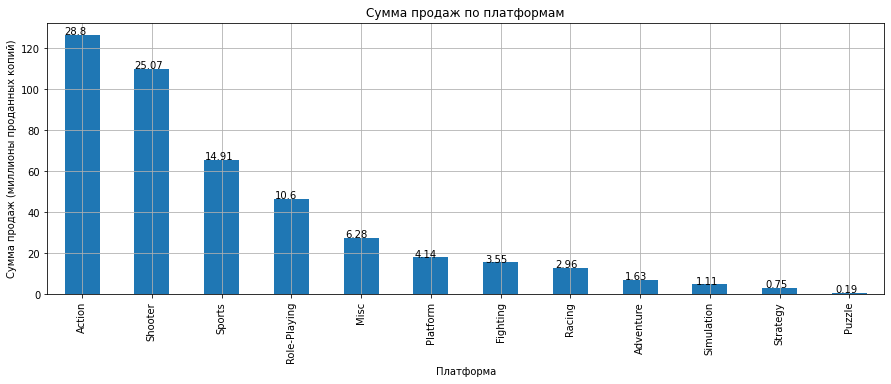

In [47]:

ax = games_2010.groupby('genre')['na_sales'].sum().sort_values(ascending = False) \
         .plot.bar(grid=True,title = 'Сумма продаж по платформам',figsize = (15,5),xlabel= 'Платформа', ylabel= 'Сумма продаж (миллионы проданных копий)')

for p in ax.patches:
    ax.annotate(str(round(p.get_height() / games_2010['na_sales'].sum() * 100,2)), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.show()

В na регионе наиболее популярными жанрами являются:
* Action (25.71%)
* Shooter (21.01%)
* Sports (13.87%)
* Misc (10.95%)
* Role-Playing (9.91%)

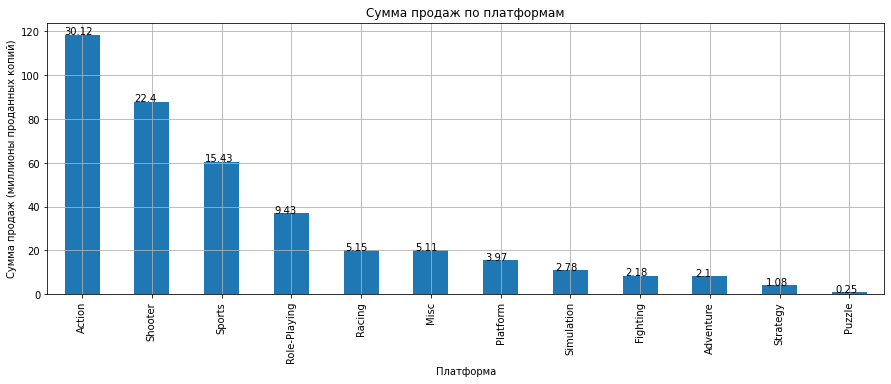

In [48]:

ax = games_2010.groupby('genre')['eu_sales'].sum().sort_values(ascending = False) \
         .plot.bar(grid=True,title = 'Сумма продаж по платформам',figsize = (15,5),xlabel= 'Платформа', ylabel= 'Сумма продаж (миллионы проданных копий)')

for p in ax.patches:
    ax.annotate(str(round(p.get_height() / games_2010['eu_sales'].sum() * 100,2)), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.show()

В eu регионе наиболее популярными жанрами являются:
* Action (27.77%)
* Shooter (20.38%)
* Sports (13.89%)
* Role-Playing (8.97%)
* Misc (7.86%)

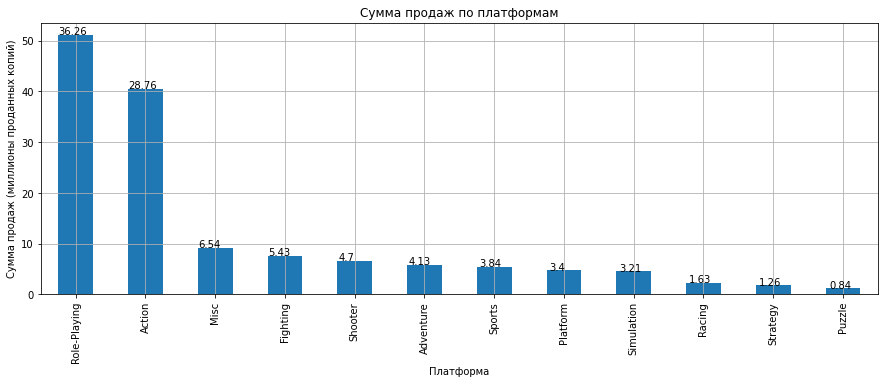

In [49]:

ax = games_2010.groupby('genre')['jp_sales'].sum().sort_values(ascending = False) \
         .plot.bar(grid=True,title = 'Сумма продаж по платформам',figsize = (15,5),xlabel= 'Платформа', ylabel= 'Сумма продаж (миллионы проданных копий)')

for p in ax.patches:
    ax.annotate(str(round(p.get_height() / games_2010['jp_sales'].sum() * 100,2)), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.show()

Подскажите, создание категории "Другие" и создание подобной диаграммы достигается только созданием дополнительного столбца или есть какие-то более хитрые способы ?


<font color='DarkMagenta'>Можно еще вот так.</font>

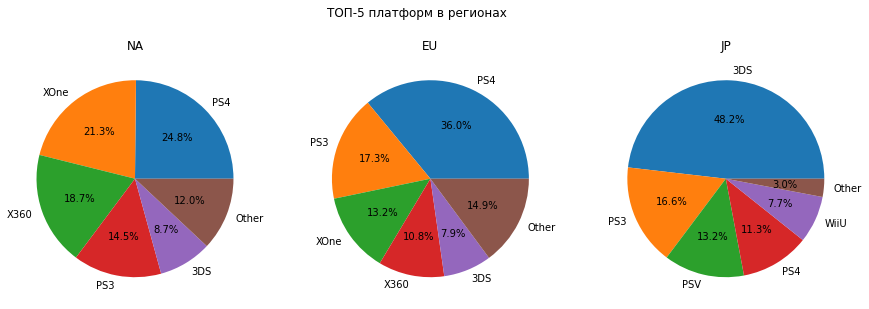

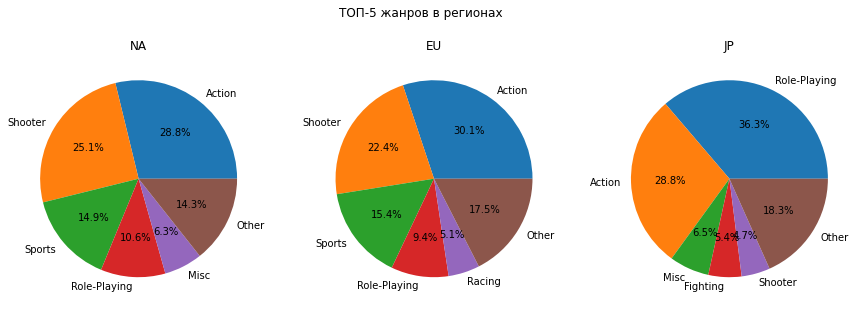

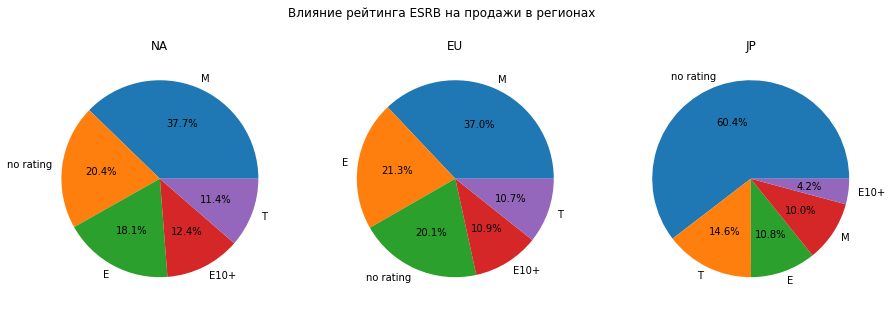

In [50]:
tmp = games_2010.copy()                   # делаем копию текущего датасета, что бы не работать с исходным    
parametr = 'platform'                     # задаем имя колонки для построения диаграмм

def pie_chart(df, parametr = 'platform'): # в функцию передаем датасет и имя колонки платформ/жанров/рейтинга
    region = df.columns[4:7]              # создаем список регионов из названий колонок
                                          # начертим круговую диаграмму для каждого региона
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    if parametr == 'platform':            # будем рисовать диаграммы по платформам
        fig.suptitle('ТОП-5 платформ в регионах')
    elif parametr == 'genre':             # будем рисовать диаграммы по жанрам
        fig.suptitle('ТОП-5 жанров в регионах')
    elif parametr == 'rating':            # будем рисовать диаграммы по возрастному рейтингу
        fig.suptitle('Влияние рейтинга ESRB на продажи в регионах')
    for r in range(len(region)):
      if parametr != 'rating':            # здесь будет формировать топ-5 и группу "другие"
                                          # выберем 5 самых продающих платформ/жанров
        df_r = (df.groupby(parametr)[region[r]].sum().reset_index().
                sort_values(region[r], ascending = False, ignore_index = True)[:5])
                                          # занесем все остальные продажи в другие палатформы/жанры
        df_r = df_r.append({parametr: 'Other', region[r]: df[region[r]].sum() - df_r[region[r]].sum()}, ignore_index= True)
      else:                               # в возрастном рейтинге строим диаграммы по всем значениям
        df_r = (df.groupby(parametr)[region[r]].sum().reset_index().
                sort_values(region[r], ascending = False, ignore_index = True))
        
      axs[r].pie(df_r[region[r]], labels = df_r[parametr], autopct='%1.1f%%')
                                          # зададим название региона.
      axs[r].set_title(df_r.columns[1].split('_')[0].upper())
    plt.show()
    
pie_chart(tmp, parametr)                  # выводим диаграмму
pie_chart(tmp, 'genre')   
pie_chart(tmp, 'rating')   

В jp регионе наиболее популярными жанрами являются:
* Role-Playing (33.93%)
* Action (23.66%)
* Misc (7.96%)
* Platform (5.18%)
* Adventure (5.14%)

В данном случае видно, что Американский и Европейский рынок очень похожи, в то время как Японский в большинстве своем самобытен. Это видно по Role-Playing играм, которые являются лидером только на этом рынке.

###### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

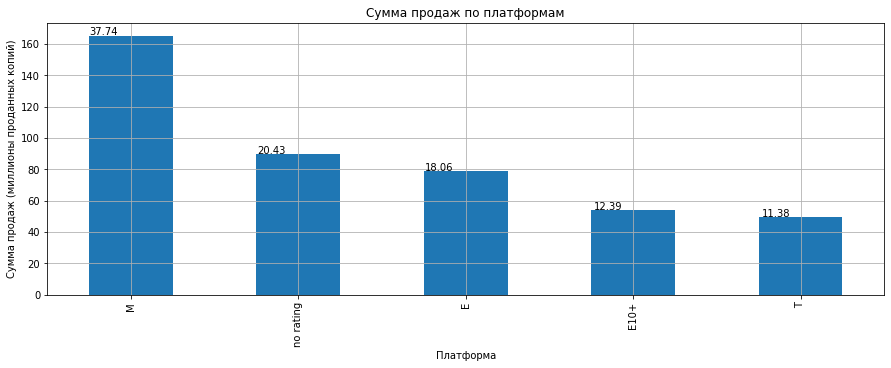

In [51]:
ax = games_2010.groupby('rating')['na_sales'].sum().sort_values(ascending = False) \
         .plot.bar(grid=True,title = 'Сумма продаж по платформам',figsize = (15,5),xlabel= 'Платформа', ylabel= 'Сумма продаж (миллионы проданных копий)')

for p in ax.patches:
    ax.annotate(str(round(p.get_height() / games_2010['na_sales'].sum() * 100,2)), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.show()

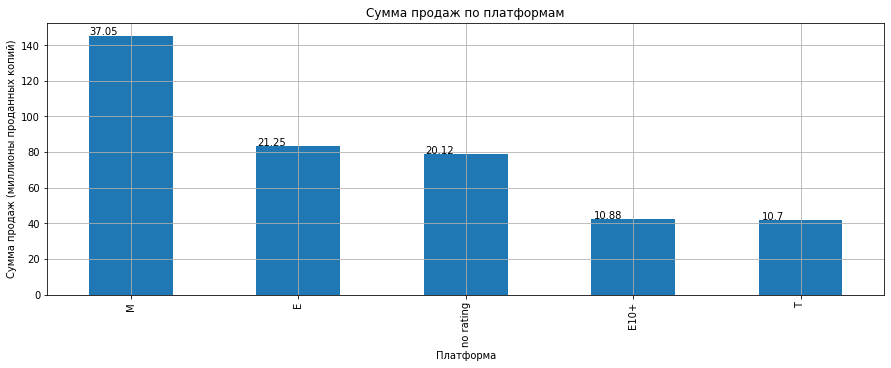

In [52]:
ax = games_2010.groupby('rating')['eu_sales'].sum().sort_values(ascending = False) \
         .plot.bar(grid=True,title = 'Сумма продаж по платформам',figsize = (15,5),xlabel= 'Платформа', ylabel= 'Сумма продаж (миллионы проданных копий)')

for p in ax.patches:
    ax.annotate(str(round(p.get_height() / games_2010['eu_sales'].sum() * 100,2)), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.show()

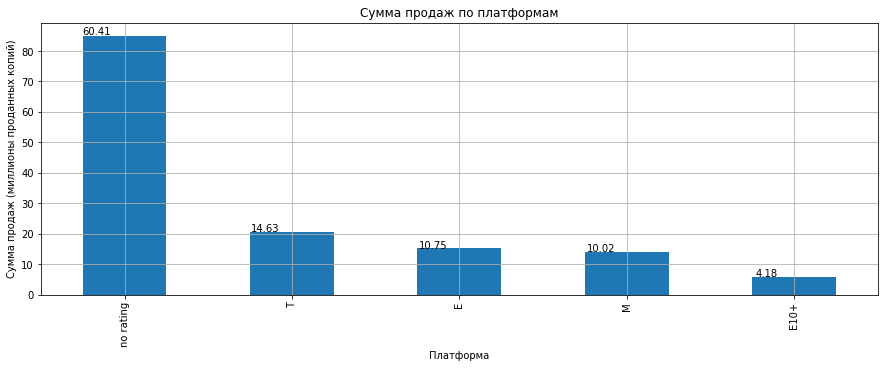

In [53]:
ax = games_2010.groupby('rating')['jp_sales'].sum().sort_values(ascending = False) \
         .plot.bar(grid=True,title = 'Сумма продаж по платформам',figsize = (15,5),xlabel= 'Платформа', ylabel= 'Сумма продаж (миллионы проданных копий)')

for p in ax.patches:
    ax.annotate(str(round(p.get_height() / games_2010['jp_sales'].sum() * 100,2)), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.show()

В данном случае так же видна уникальность Японского региона, в котором рейтинг E и T наиболее популярен. В свою очередь Американский и Европейский рынок очень похожи. Отдельно можно отметить no rating, который выделяется больше всего в Японии, что говорит о превосходстве местных игр над американскими.

**Вывод** В данном разделе была поставлена задача формулированию образа пользователя. Для пользователя каждого региона были формулированы наиболее популярные жанры и платформы.

##### Шаг 5. Проверьте гипотезы

###### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

Н0 (нулевая гипотеза) - средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Н1 (альтернативная гипотеза) - средние пользовательские рейтинги платформ Xbox One и PC отличаются между собой.

In [55]:
s_1 = games_2010[games_2010['platform']=="XOne"]['user_score'].dropna()
s_2 = games_2010[games_2010['platform']=="PC"]['user_score'].dropna()

In [56]:
from scipy.stats import levene
stat, p = levene(s_1, s_2)
p

0.003897553110130418

In [57]:
alpha = .05 

results_1 = st.ttest_ind(
    s_1, 
    s_2,
    equal_var = True)

print('p-значение:', results_1.pvalue)

if (results_1.pvalue < alpha): # код ревьюера
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.14012658403611647
Не получилось отвергнуть нулевую гипотезу


По результатам статтеста у нас нет оснований отвергнуть нулевую гипотезу, что пользовательские рейтинги для рассматриваемых двух платформ равны.

###### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Н0 (нулевая гипотеза) - средние пользовательские рейтинги жанров Action и Sports одинаковые.

Н1 (альтернативная гипотеза) - средние пользовательские рейтинги жанров Action и Sports отличаются между собой.

In [58]:
s_3 = games_2010[games_2010['genre']=="Action"]['user_score'].dropna()
s_4 = games_2010[games_2010['genre']=="Sports"]['user_score'].dropna()

In [59]:
alpha = .05

results_2 = st.ttest_ind(
    s_3, 
    s_4,
    equal_var = False)

print('p-значение:', results_2.pvalue)

if (results_2.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 1.4460039700704315e-20
Отвергаем нулевую гипотезу


По результатам статтеста мы отвергаем нулевую гипотезу в пользу альтернативной, что пользовательские рейтинги для рассматриваемых жанров различаются

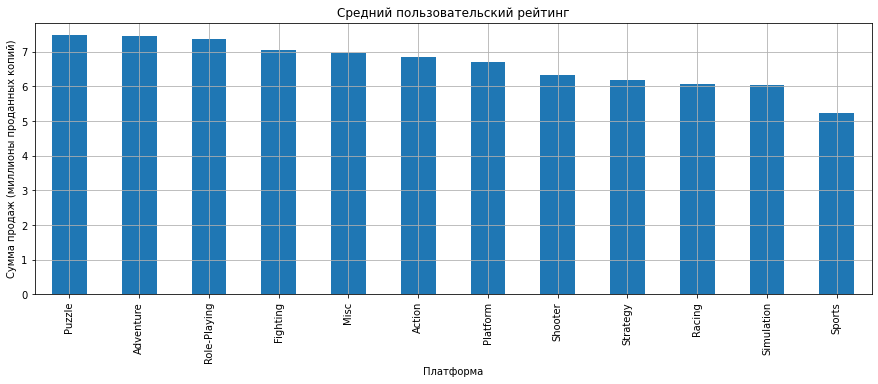

In [60]:
plt.show(games_2010.groupby('genre')['user_score'].mean().sort_values(ascending = False) \
         .plot.bar(grid=True,title = 'Средний пользовательский рейтинг',figsize = (15,5),xlabel= 'Платформа', ylabel= 'Сумма продаж (миллионы проданных копий)'))

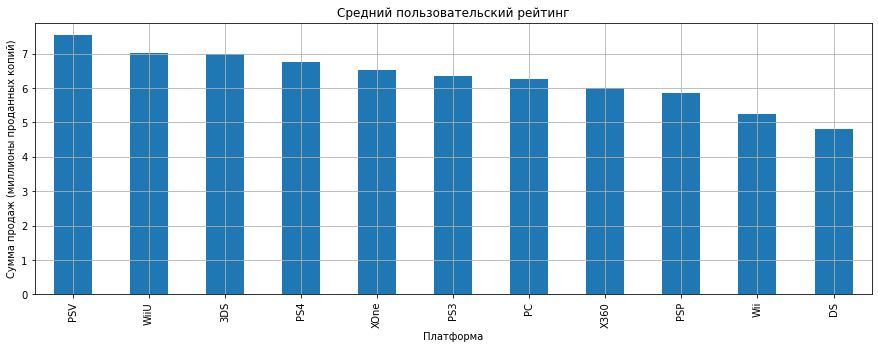

In [61]:
plt.show(games_2010.groupby('platform')['user_score'].mean().sort_values(ascending = False) \
         .plot.bar(grid=True,title = 'Средний пользовательский рейтинг',figsize = (15,5),xlabel= 'Платформа', ylabel= 'Сумма продаж (миллионы проданных копий)'))

Для проверки выборок в обоих случаях исполльзовался  t-критерий Стьюдента, поскольку выорки зависимы между собой.

В качестве alpha было выбрано 0.05 так как это стандартное значение, а при данном исследовании было не очень большое количество данных, так что значение в 0.01 могло исказить результат.

В первом случае 

Н0 (нулевая гипотеза) - средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Н1 (альтернативная гипотеза) - средние пользовательские рейтинги платформ Xbox One и PC отличаются между собой.

Была сформулирована так, поскольку вопрос был в том, одинаковые ли рейтинги. Так что 0 гипотеза её подтверждала,  аальтернативная опровергала.

Во втором случае 

Н0 (нулевая гипотеза) - средние пользовательские рейтинги жанров Action и Sports одинаковые.

Н1 (альтернативная гипотеза) - средние пользовательские рейтинги жанров Action и Sports отличаются между собой.

Тоже самое, принцип формулирования гипотеза шел от вопроса, а альтернативной от его отрицания.

**Вывод** В данном шаге были сформулированы и проверены две гипотезы.

##### Шаг 6. Напишите общий вывод

**Шаг 1. Откройте файл с данными**

Файл был открыт корректно

**Шаг 2. Подготовьте данные**

Ознакомились с данными, посмотрели на общую информацию о датасете, выявили пропуски и не соответствие типов данных.
Многие пропуски, например в столбцах оценок мы оставили незаполненными, чтобы не исказить статистику.
Также на данном этапе мы посчитали общее количество продаж по всем регионам и записали результат в столбец total_sales.

**Шаг 3. Проведите исследовательский анализ данных**

Было обнаружено, что рост выпуска игр приходится на 1994 год, а пик на 2008-2009 гг.
В среднем срок жизни платформы - 10 лет, также было решено оставить данные с 2013 по 2016 гг.
3 потенциально прибыльных платформ - PS4, XOne, 3DS.
Наибольшие медианные продажи у платформ XOne и WiiU.
Почти у всех платформ есть определенные игры, которые "выстрелили".
Больше всего игр жанра Action, затем идут Shooter и Role-Playing.
Лучше всего покупают игры жанра Action, Shooter идёт на втором месте - и он самый выгодный, Role-Playing ожидаемо стоит на третьем месте по продажам.
Adventure сильно отстаёт по продажам, хотя игр выпускается много.

**Шаг 4. Составьте портрет пользователя каждого региона**

В NA самая популярная платформа PS4. Европейцы также предпочитают PS4. В Японии популярны 3DS.
В NA и EU самые популярные жанры практически совпадают. В JP вкусы отличаются.
В NA рейтинги M и T имеют практически одинаковую долю на рынке - по 38% и также рейтинги Е и Е10+ имеют практически одинаковую долю на рынке - по 14%. В EU все четрыре рейтинга распределенны практически равномерно - в среднем по 25%. В JP с учетом восточной психо-национальной особенности, лидером в рейтинге является T — «Подросткам» - 73.4%, рейтинг M - 21.5% и совсем малую часть занимают рейтинги Е и Е10+

**Шаг 5. Проверьте гипотезы**

Средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Гипотеза не подтвердилась.

Средние пользовательские рейтинги жанров Action и Sports разные. Гипотеза подтвердилась!.